In [2]:
from sklearn.datasets import make_moons, load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, roc_curve, 
                             precision_recall_curve, f1_score, classification_report, plot_precision_recall_curve)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
def visualize(X, labels):
    
    unique_labels = set(labels)
    N = len(unique_labels)
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('CMAP', cmaplist, cmap.N)
    
    
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap)
    
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    
    plt.legend(*scatter.legend_elements(), fontsize=16)

function for drawing confusion_matrix

In [4]:
def draw_confusion_matrix(ytest, ypred):
  matrix = confusion_matrix(ytest, ypred)
  #sns.
  #print(matrix)
  plt.figure(figsize=(12, 12))
  sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=True)
  plt.xlabel('true label')
  plt.ylabel('predicted label')

In [5]:
def draw_digits(X, target):
  fig = plt.figure(figsize=(6,6))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.05, wspace=0.05)
  for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(target[i]))

In [6]:
estimators1 = [('model' + str(i),MLPClassifier(max_iter=5000)) for i in range(3)] + [('gauss',GaussianNB())] + [('multinom', MultinomialNB())]
weights1 = [3, 5, 2, 1, 4]

estimators2 = [('model' + str(i),MLPClassifier(max_iter=5000)) for i in range(3)]
weights2 = [8, 4, 7]

estimators3 = [('gauss',GaussianNB())] + [('multinom', MultinomialNB())]
weights3 = [0.6, 0.7]

estimators4 = [('model' + str(i),MLPClassifier(max_iter=5000)) for i in range(3)] + [('gauss',GaussianNB())]

In [7]:
X1, y1 = make_moons()
x_max_abs = np.abs(X1).max()
X1 += x_max_abs

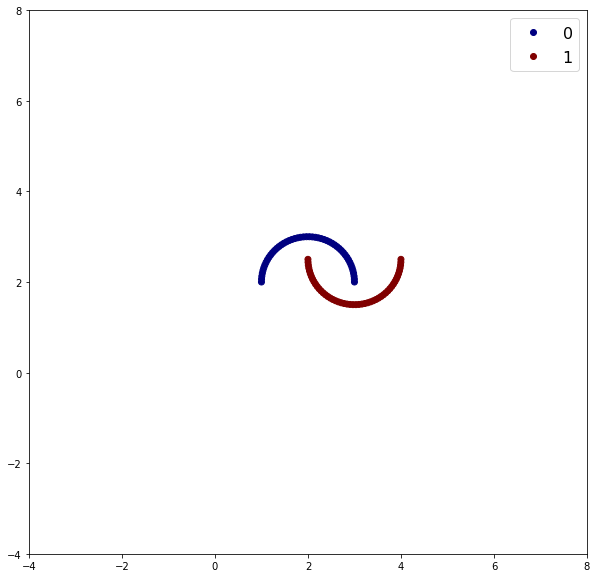

In [8]:
visualize(X1, y1)

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4)

# Neural network

Default neural network

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy score for default neural network: 0.750 


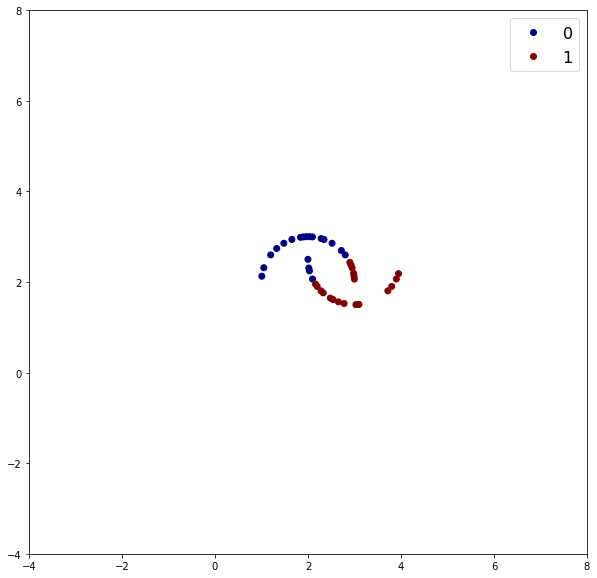

In [10]:
neural_network0 = MLPClassifier()
neural_network0.fit(X1_train, y1_train)
res0 = neural_network0.predict(X1_test)
visualize(X1_test, res0)
print("Accuracy score for default neural network: %.3f " % accuracy_score(res0, y1_test))

In [11]:
draw_confusion_matrix(y1_test, res0)

In [12]:
print(classification_report(y1_test, res0))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.70      0.78      0.74        18

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.76      0.75      0.75        40



Neural network 1 combination of input parameters

In [13]:
neural_network1 = MLPClassifier(early_stopping=True, hidden_layer_sizes=(3,2))
neural_network1.fit(X1_train, y1_train)
res1 = neural_network1.predict(X1_test)
visualize(X3_test, res1)
print("Accuracy score for neural network1: %.3f " % accuracy_score(res1, y1_test))

Accuracy score for neural network1: 0.450 


In [14]:
draw_confusion_matrix(y1_test, res1)

In [15]:
print(classification_report(y1_test, res1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.45      1.00      0.62        18

    accuracy                           0.45        40
   macro avg       0.23      0.50      0.31        40
weighted avg       0.20      0.45      0.28        40



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural network 2 combination of input parameters

Accracy score for neural network2: 0.68


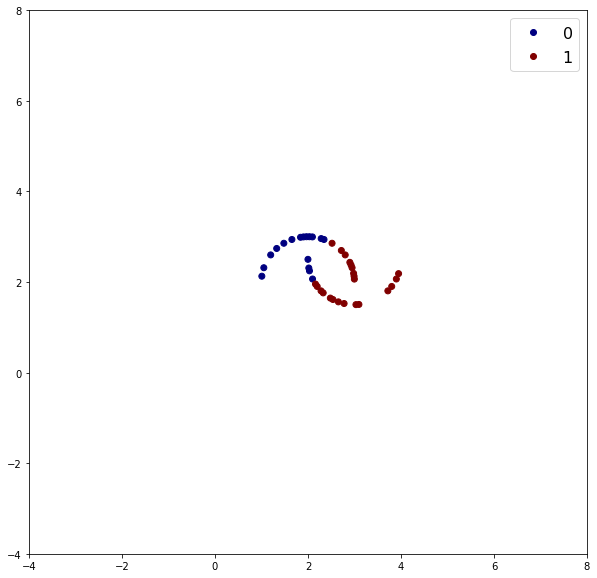

In [16]:
neural_network2 = MLPClassifier(early_stopping=True, hidden_layer_sizes=(90,20,80,100))
neural_network2.fit(X1_train, y1_train)
res2 = neural_network2.predict(X1_test)
visualize(X1_test, res2)
print("Accracy score for neural network2: %.2f" % accuracy_score(res2, y1_test))

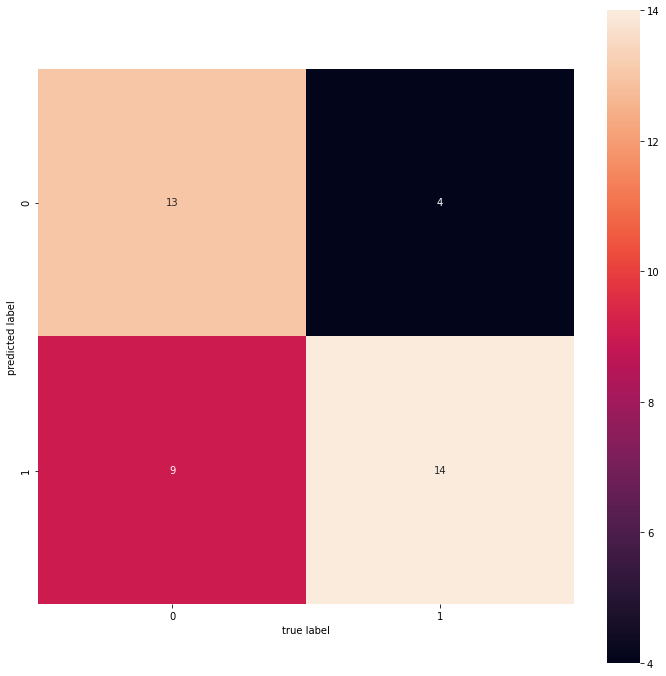

In [17]:
draw_confusion_matrix(y1_test, res2)

In [18]:
print(classification_report(y1_test, res2))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.61      0.78      0.68        18

    accuracy                           0.68        40
   macro avg       0.69      0.68      0.67        40
weighted avg       0.69      0.68      0.67        40



Neural network 3 combination of input parameters

Accuracy score for neural network2: 0.72 


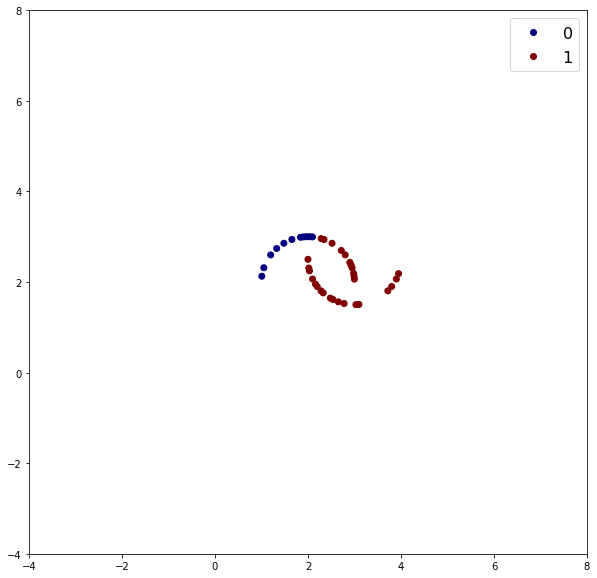

In [19]:
neural_network3 = MLPClassifier(early_stopping=True, hidden_layer_sizes=(150,200,300))
neural_network3.fit(X1_train, y1_train)
res3 = neural_network3.predict(X1_test)
visualize(X1_test, res3)
print("Accuracy score for neural network2: %.2f " % accuracy_score(res3, y1_test))

In [20]:
draw_confusion_matrix(y1_test, res3)

In [21]:
print(classification_report(y1_test, res3))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        22
           1       0.62      1.00      0.77        18

    accuracy                           0.73        40
   macro avg       0.81      0.75      0.72        40
weighted avg       0.83      0.72      0.71        40



####Вивести значення функції втрат на декількох перших і декількох останніх ітераціях

Перші 20 значень

In [59]:
neural_network3.loss_curve_[:20]

[0.7129502055491663,
 0.6554434393948205,
 0.6121062870426447,
 0.5752955285955422,
 0.5405385355441116,
 0.5061028125411807,
 0.47338236099428266,
 0.4419949022548727,
 0.412167931467557,
 0.38419404497769327,
 0.3585613643871176,
 0.3359523448769896,
 0.31688962985817754,
 0.30145727091067026,
 0.28954321942229183]

Останні 20 значень

In [60]:
neural_network3.loss_curve_[-20:]

[0.7129502055491663,
 0.6554434393948205,
 0.6121062870426447,
 0.5752955285955422,
 0.5405385355441116,
 0.5061028125411807,
 0.47338236099428266,
 0.4419949022548727,
 0.412167931467557,
 0.38419404497769327,
 0.3585613643871176,
 0.3359523448769896,
 0.31688962985817754,
 0.30145727091067026,
 0.28954321942229183]

Вивести значення середньої точності класифікації на навчальній і тестовій множинах, використовуючи score().

In [61]:
score_res_train = neural_network3.score(X1_train, y1_train)
score_res_test = neural_network3.score(X1_test, y1_test)
print("score for train set: %f" % score_res_train)
print("score for test set: %f" % score_res_test)

score for train set: 0.833333
score for test set: 0.725000


# Voting classifier

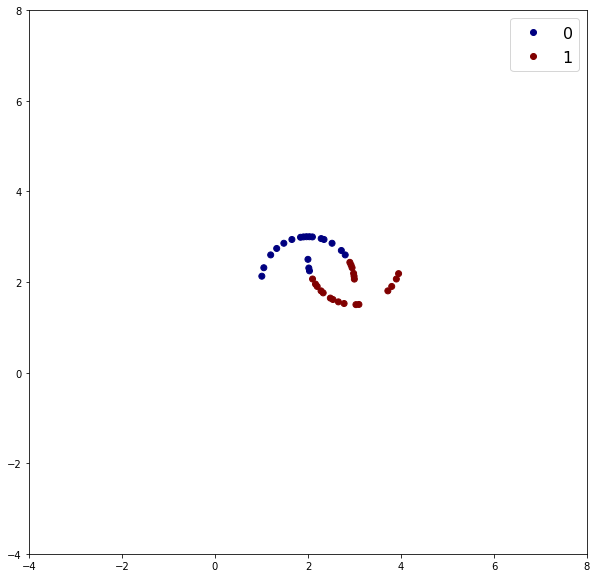

In [25]:
voting_classifier1 = VotingClassifier(estimators=estimators1, voting='hard', weights=weights1)
voting_classifier1.fit(X1_train, y1_train)
voting_res1 = voting_classifier1.predict(X1_test)
visualize(X1_test, voting_res1)

['model0' 'model1' 'model2' 'gauss' 'multinom' 'voter']
[0.76923077 0.82051282 0.76923077 0.78947368 0.73170732 0.76923077]


<BarContainer object of 6 artists>

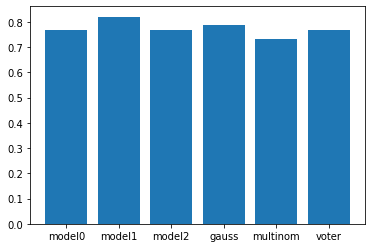

In [26]:
f1_scores = []
for _, el in estimators1:
  el.fit(X1_train, y1_train)
  voting_res1 = el.predict(X1_test)
  score = f1_score(y1_test, voting_res1)
  f1_scores.append(score)
voting_res1 = voting_classifier1.predict(X1_test)
score = f1_score(y1_test, voting_res1)
f1_scores.append(score)
f1_scores = np.asarray(f1_scores)
names1 = np.append(np.array(estimators1)[:,0], np.array(np.array(["voter"])))
print(names1)
print(f1_scores)
plt.bar(names1, f1_scores)


Порiвняти декiль-ка ансамблiв, якi утворенi на основi однихestimatorsi вiдрiзня-ються значеннями параметрiв.

['classifier1' 'classifier2' 'classifier3']
[0.76923077 0.76923077 0.78947368]


<BarContainer object of 3 artists>

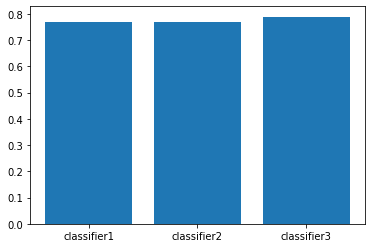

In [27]:
f1_scores = []
el1 = VotingClassifier(estimators=estimators1, voting='hard', weights=weights1)
el1.fit(X1_train, y1_train)
voting_res1 = el1.predict(X1_test)
score = f1_score(y1_test, voting_res1)
f1_scores.append(score)
del voting_res1
del score

weights12 = [5, 5, 5, 1, 1]
el2 = VotingClassifier(estimators=estimators1, voting='hard', weights=weights12)
el2.fit(X1_train, y1_train)
voting_res1 = el2.predict(X1_test)
score = f1_score(y1_test, voting_res1)
f1_scores.append(score)
del voting_res1
del score

weights13 = [1, 2, 1, 6, 6]
el3 = VotingClassifier(estimators=estimators1, voting='hard', weights=weights13)
el3.fit(X1_train, y1_train)
voting_res1 = el3.predict(X1_test)
score = f1_score(y1_test, voting_res1)
f1_scores.append(score)
del voting_res1
del score

f1_scores = np.asarray(f1_scores)
names1 = np.array(["classifier1", "classifier2", "classifier3"])
print(names1)
print(f1_scores)
plt.bar(names1, f1_scores)

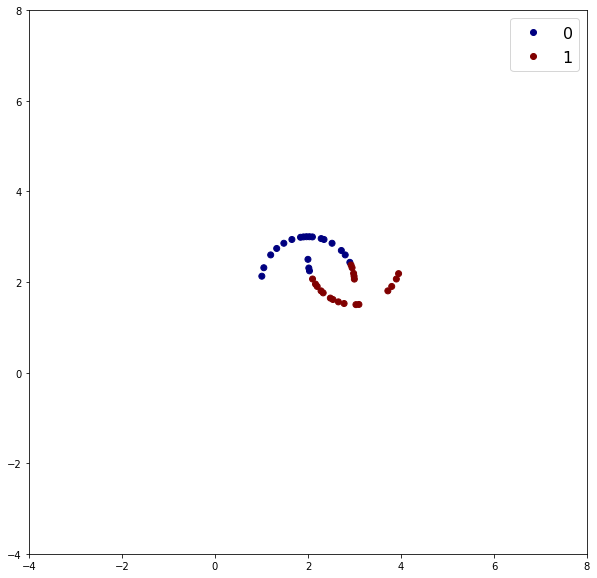

In [28]:
voting_classifier2 = VotingClassifier(estimators=estimators2, voting='hard', weights=weights2)
voting_classifier2.fit(X1_train, y1_train)
voting_res1 = voting_classifier2.predict(X1_test)
visualize(X1_test, voting_res1)

['model0' 'model1' 'model2' 'voter']
[0.76923077 0.76923077 0.78947368 0.78947368]


<BarContainer object of 4 artists>

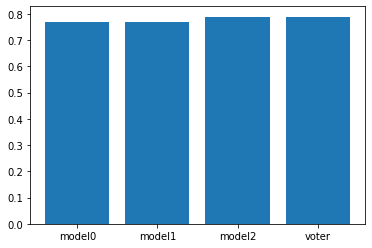

In [29]:
f1_scores = []
for _, el in estimators2:
  el.fit(X1_train, y1_train)
  voting_res1 = el.predict(X1_test)
  score = f1_score(y1_test, voting_res1)
  f1_scores.append(score)

voting_res1 = voting_classifier2.predict(X1_test)
score = f1_score(y1_test, voting_res1)
f1_scores.append(score)
f1_scores = np.asarray(f1_scores)
names1 = np.append(np.array(estimators2)[:,0], np.array(np.array(["voter"])))
print(names1)
print(f1_scores)
plt.bar(names1, f1_scores)

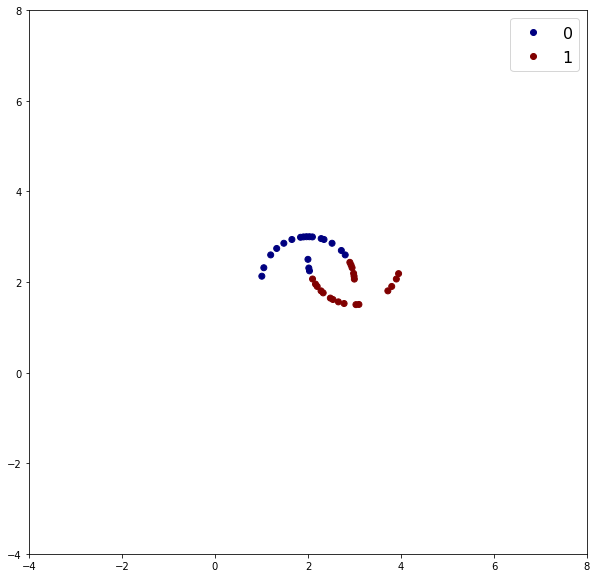

In [30]:
voting_classifier3 = VotingClassifier(estimators=estimators3, voting='soft', weights=weights3)
voting_classifier3.fit(X1_train, y1_train)
voting_res1 = voting_classifier3.predict(X1_test)
visualize(X1_test, voting_res1)

['gauss' 'multinom' 'voter']
[0.78947368 0.73170732 0.76923077]


<BarContainer object of 3 artists>

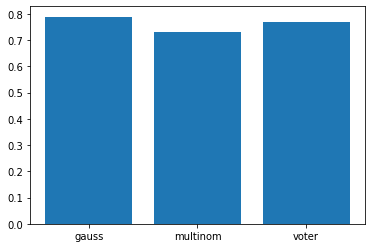

In [31]:
f1_scores = []
for _, el in estimators3:
  el.fit(X1_train, y1_train)
  voting_res1 = el.predict(X1_test)
  score = f1_score(y1_test, voting_res1)
  f1_scores.append(score)

voting_res1 = voting_classifier3.predict(X1_test)
score = f1_score(y1_test, voting_res1)
f1_scores.append(score)
f1_scores = np.asarray(f1_scores)
names1 = np.append(np.array(estimators3)[:,0], np.array(np.array(["voter"])))
print(names1)
print(f1_scores)
plt.bar(names1, f1_scores)

In [32]:
x_points = []
y_points = []

for i in range(1, 10):
  estimatiors_test = [(str(j), estimators1[np.random.randint(5)][1]) for j in range(i)]
  el = VotingClassifier(estimators=estimatiors_test)
  el.fit(X1_train, y1_train)
  voting_res1 = el.predict(X1_test)
  score = accuracy_score(y1_test, voting_res1)
  x_points.append(i)
  y_points.append(score)

plt.plot(x_points, y_points, linewidth=2.0)

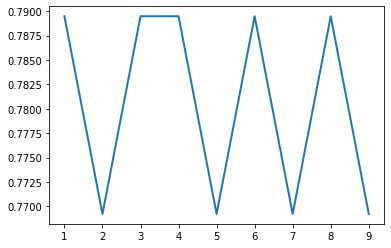

In [33]:
x_points = []
y_points = []
for i in range(1,10):
  estimatiors_test = [(str(j), estimators1[np.random.randint(5)][1]) for j in range(i)]
  el = VotingClassifier(estimators=estimatiors_test)
  el.fit(X1_train, y1_train)
  voting_res1 = el.predict(X1_test)
  score = f1_score(y1_test, voting_res1)
  x_points.append(i)
  y_points.append(score)

plt.plot(x_points, y_points, linewidth=2.0)

Accuracy score for default voting classifier: 0.800 


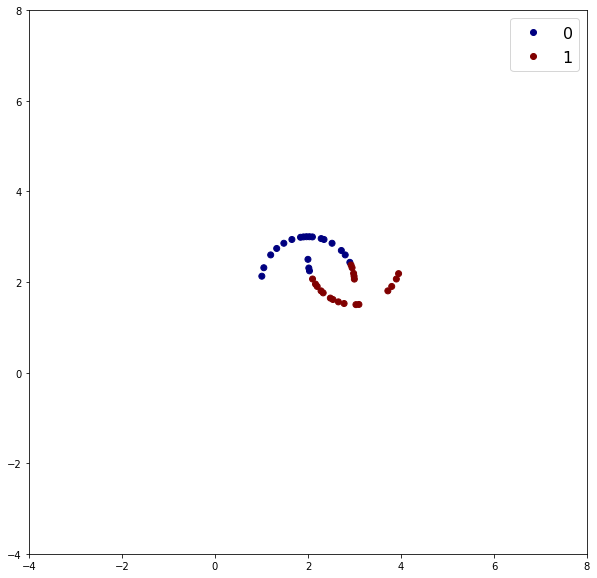

In [34]:
voting_classifier4 = VotingClassifier(estimators=estimators4)
voting_classifier4.fit(X1_train, y1_train)
voting_res1 = voting_classifier4.predict(X1_test)
print("Accuracy score for default voting classifier: %.3f " % accuracy_score(voting_res1, y1_test))
visualize(X1_test, voting_res1)

# Load digits dataset

In [36]:
dst = load_digits()

In [37]:
dst.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [39]:
print(dst.images.shape)
print(dst.target.shape)

(1797, 8, 8)
(1797,)


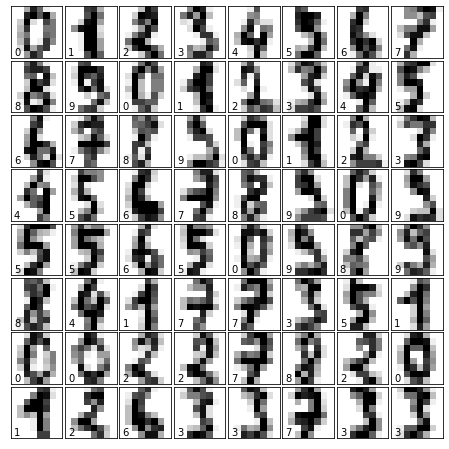

In [40]:
draw_digits(dst.images, dst.target)

In [42]:
X2 = dst.data
y2 = dst.target
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4)

## Neural network

default neural network

In [45]:
neural_network20 = MLPClassifier()
neural_network20.fit(X2_train, y2_train)
res20 = neural_network20.predict(X2_test)
print("Accuracy score for default neural network: %.3f " % accuracy_score(res20, y2_test))

Accuracy score for default neural network: 0.975 


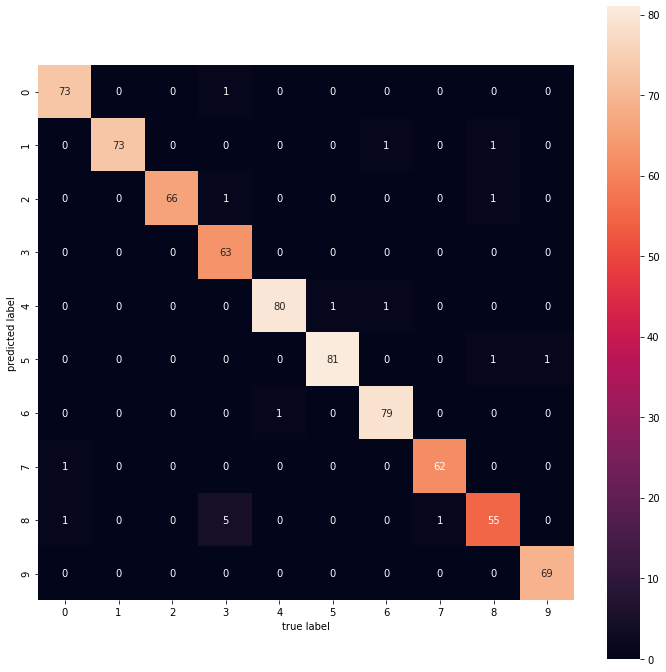

In [46]:
draw_confusion_matrix(y2_test, res20)

In [47]:
print(classification_report(y2_test, res20))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.97      1.00      0.99        73
           2       0.97      1.00      0.99        66
           3       1.00      0.90      0.95        70
           4       0.98      0.99      0.98        81
           5       0.98      0.99      0.98        82
           6       0.99      0.98      0.98        81
           7       0.98      0.98      0.98        63
           8       0.89      0.95      0.92        58
           9       1.00      0.99      0.99        70

    accuracy                           0.97       719
   macro avg       0.97      0.97      0.97       719
weighted avg       0.98      0.97      0.97       719



In [49]:
neural_network21 = MLPClassifier(early_stopping=True, hidden_layer_sizes=(3,2))
neural_network21.fit(X2_train, y2_train)
res21 = neural_network21.predict(X2_test)
print("Accuracy score for neural network1: %.3f " % accuracy_score(res21, y2_test))

Accuracy score for neural network1: 0.147 


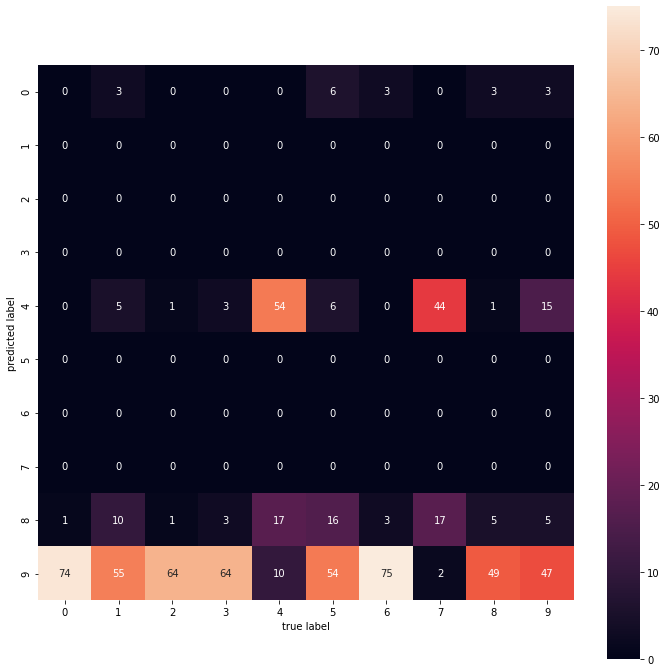

In [50]:
draw_confusion_matrix(y2_test, res21)

In [51]:
print(classification_report(y2_test, res21))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.00      0.00      0.00        73
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00        70
           4       0.42      0.67      0.51        81
           5       0.00      0.00      0.00        82
           6       0.00      0.00      0.00        81
           7       0.00      0.00      0.00        63
           8       0.06      0.09      0.07        58
           9       0.10      0.67      0.17        70

    accuracy                           0.15       719
   macro avg       0.06      0.14      0.08       719
weighted avg       0.06      0.15      0.08       719



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
neural_network22 = MLPClassifier(early_stopping=True, hidden_layer_sizes=(90,20,80,100))
neural_network22.fit(X2_train, y2_train)
res22 = neural_network22.predict(X2_test)
print("Accracy score for neural network2: %.2f" % accuracy_score(res22, y2_test))

Accracy score for neural network2: 0.97


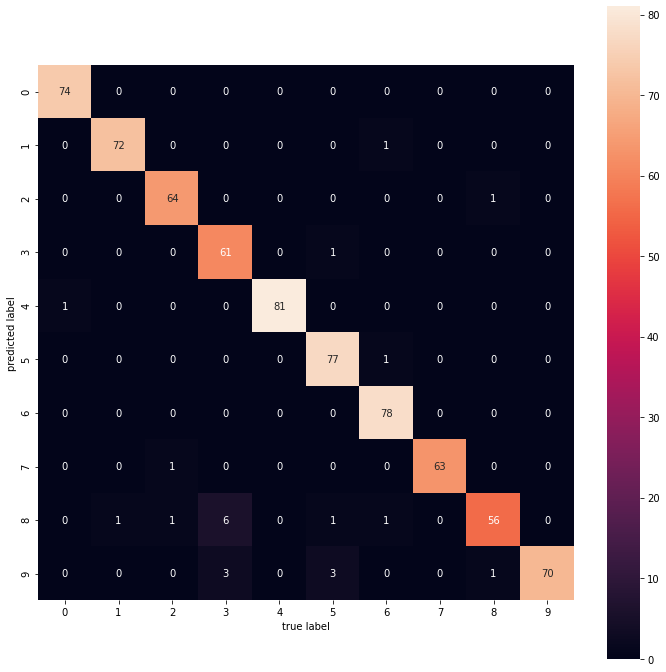

In [54]:
draw_confusion_matrix(y2_test, res22)

In [56]:
neural_network23 = MLPClassifier(early_stopping=True, hidden_layer_sizes=(150,200,300))
neural_network23.fit(X2_train, y2_train)
res23 = neural_network23.predict(X2_test)
print("Accuracy score for neural network2: %.2f " % accuracy_score(res23, y2_test))

Accuracy score for neural network2: 0.98 


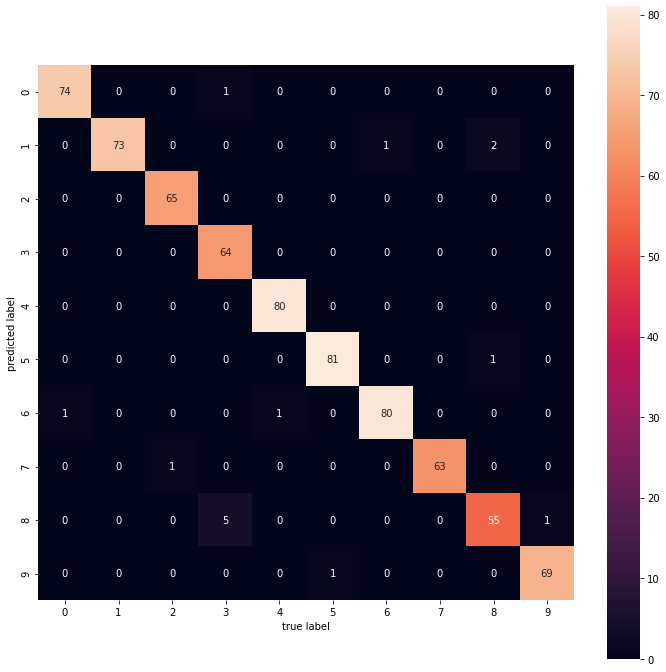

In [57]:
draw_confusion_matrix(y2_test, res23)

In [58]:
print(classification_report(y1_test, res3))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        22
           1       0.62      1.00      0.77        18

    accuracy                           0.73        40
   macro avg       0.81      0.75      0.72        40
weighted avg       0.83      0.72      0.71        40



### Вивести значення функції втрат на декількох перших і декількох останніх ітерація

Перші 20 значень

In [62]:
neural_network3.loss_curve_[:20]

[0.7129502055491663,
 0.6554434393948205,
 0.6121062870426447,
 0.5752955285955422,
 0.5405385355441116,
 0.5061028125411807,
 0.47338236099428266,
 0.4419949022548727,
 0.412167931467557,
 0.38419404497769327,
 0.3585613643871176,
 0.3359523448769896,
 0.31688962985817754,
 0.30145727091067026,
 0.28954321942229183]

Останні 20 значень

In [63]:
neural_network3.loss_curve_[-20:]

[0.7129502055491663,
 0.6554434393948205,
 0.6121062870426447,
 0.5752955285955422,
 0.5405385355441116,
 0.5061028125411807,
 0.47338236099428266,
 0.4419949022548727,
 0.412167931467557,
 0.38419404497769327,
 0.3585613643871176,
 0.3359523448769896,
 0.31688962985817754,
 0.30145727091067026,
 0.28954321942229183]

Вивести значення середньої точності класифікації на навчальній і тестовій множинах, використовуючи score()

In [65]:
score_res_train = neural_network3.score(X1_train, y1_train)
score_res_test = neural_network3.score(X1_test, y1_test)
print("score for train set: %f" % score_res_train)
print("score for test set: %f" % score_res_test)

score for train set: 0.833333
score for test set: 0.725000


## Voting classifier

In [66]:
voting_classifier21 = VotingClassifier(estimators=estimators1, voting='hard', weights=weights1)
voting_classifier21.fit(X2_train, y2_train)
voting_res21 = voting_classifier2.predict(X1_test)

['model0' 'model1' 'model2' 'gauss' 'multinom' 'voter']
[0.97635605 0.97635605 0.97635605 0.84700974 0.89151599 0.97635605]


<BarContainer object of 6 artists>

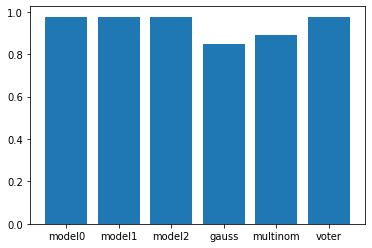

In [70]:
f1_scores = []
for _, el in estimators1:
  el.fit(X2_train, y2_train)
  voting_res1 = el.predict(X2_test)
  score = f1_score(y2_test, voting_res1, average='micro')
  f1_scores.append(score)

voting_res1 = voting_classifier21.predict(X2_test)
score = f1_score(y2_test, voting_res1, average='micro')
f1_scores.append(score)
f1_scores = np.asarray(f1_scores)
names1 = np.append(np.array(estimators1)[:,0], np.array(np.array(["voter"])))
print(names1)
print(f1_scores)
plt.bar(names1, f1_scores)

Порiвняти декiль-ка ансамблiв, якi утворенi на основi одних estimators i вiдрiзня-ються значеннями параметрiв

['classifier1' 'classifier2' 'classifier3']
[0.97913769 0.98331015 0.92628651]


<BarContainer object of 3 artists>

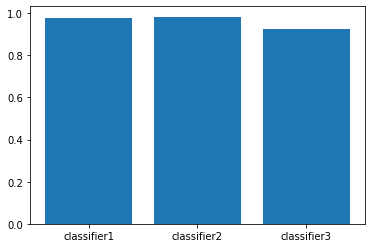

In [71]:
f1_scores = []
el1 = VotingClassifier(estimators=estimators1, voting='hard', weights=weights1)
el1.fit(X2_train, y2_train)
voting_res1 = el1.predict(X2_test)
score = f1_score(y2_test, voting_res1, average='micro')
f1_scores.append(score)
del voting_res1
del score

weights12 = [5, 5, 5, 1, 1]
el2 = VotingClassifier(estimators=estimators1, voting='hard', weights=weights12)
el2.fit(X2_train, y2_train)
voting_res1 = el2.predict(X2_test)
score = f1_score(y2_test, voting_res1, average='micro')
f1_scores.append(score)
del voting_res1
del score

weights13 = [1, 2, 1, 6, 6]
el3 = VotingClassifier(estimators=estimators1, voting='hard', weights=weights13)
el3.fit(X2_train, y2_train)
voting_res1 = el3.predict(X2_test)
score = f1_score(y2_test, voting_res1, average='micro')
f1_scores.append(score)
del voting_res1
del score

f1_scores = np.asarray(f1_scores)
names1 = np.array(["classifier1", "classifier2", "classifier3"])
print(names1)
print(f1_scores)
plt.bar(names1, f1_scores)

In [76]:
voting_classifier22 = VotingClassifier(estimators=estimators2, voting='hard', weights=weights2)
voting_classifier22.fit(X2_train, y2_train)
voting_res1 = voting_classifier22.predict(X2_test)
print(f1_score(y2_test, voting_res1, average='micro'))

0.9735744089012517


['model0' 'model1' 'model2' 'voter']
[0.97496523 0.97357441 0.97218359 0.97635605]


<BarContainer object of 4 artists>

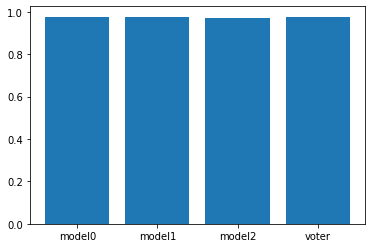

In [79]:
f1_scores = []
for _, el in estimators2:
  el.fit(X2_train, y2_train)
  voting_res1 = el.predict(X2_test)
  score = f1_score(y2_test, voting_res1, average='micro')
  f1_scores.append(score)

voting_res1 = voting_classifier22.predict(X2_test)
score = f1_score(y2_test, voting_res1, average='micro')
f1_scores.append(score)
f1_scores = np.asarray(f1_scores)
names1 = np.append(np.array(estimators2)[:,0], np.array(np.array(["voter"])))
print(names1)
print(f1_scores)
plt.bar(names1, f1_scores)

In [80]:
voting_classifier23 = VotingClassifier(estimators=estimators3, voting='soft', weights=weights3)
voting_classifier23.fit(X2_train, y2_train)
voting_res1 = voting_classifier23.predict(X2_test)

['gauss' 'multinom' 'voter']
[0.84700974 0.89151599 0.89012517]


<BarContainer object of 3 artists>

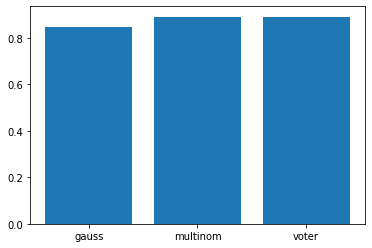

In [81]:
f1_scores = []
for _, el in estimators3:
  el.fit(X2_train, y2_train)
  voting_res1 = el.predict(X2_test)
  score = f1_score(y2_test, voting_res1, average='micro')
  f1_scores.append(score)

voting_res1 = voting_classifier23.predict(X2_test)
score = f1_score(y2_test, voting_res1, average='micro')
f1_scores.append(score)
f1_scores = np.asarray(f1_scores)
names1 = np.append(np.array(estimators3)[:,0], np.array(np.array(["voter"])))
print(names1)
print(f1_scores)
plt.bar(names1, f1_scores)

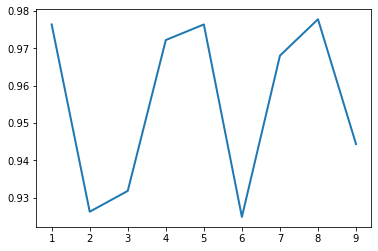

In [82]:
x_points = []
y_points = []

for i in range(1, 10):
  estimatiors_test = [(str(j), estimators1[np.random.randint(5)][1]) for j in range(i)]
  el = VotingClassifier(estimators=estimatiors_test)
  el.fit(X2_train, y2_train)
  voting_res1 = el.predict(X2_test)
  score = accuracy_score(y2_test, voting_res1)
  x_points.append(i)
  y_points.append(score)

plt.plot(x_points, y_points, linewidth=2.0)

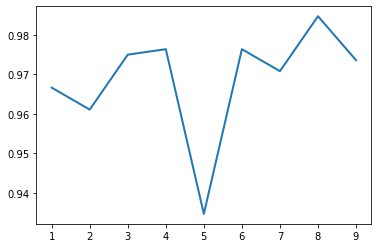

In [84]:
x_points = []
y_points = []
for i in range(1,10):
  estimatiors_test = [(str(j), estimators1[np.random.randint(5)][1]) for j in range(i)]
  el = VotingClassifier(estimators=estimatiors_test)
  el.fit(X2_train, y2_train)
  voting_res1 = el.predict(X2_test)
  score = f1_score(y2_test, voting_res1, average='micro')
  x_points.append(i)
  y_points.append(score)

plt.plot(x_points, y_points, linewidth=2.0)

In [85]:
voting_classifier24 = VotingClassifier(estimators=estimators4)
voting_classifier24.fit(X2_train, y2_train)
voting_res1 = voting_classifier24.predict(X2_test)
print("Accuracy score for default voting classifier: %.3f " % accuracy_score(voting_res1, y2_test))

Accuracy score for default voting classifier: 0.979 
